###  Кластеризация методом DBSCAN
##                                Версия  3


In [ ]:
#  Активируем библиотеки

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [ ]:
#  Активируем процедуру DBSCAN

from sklearn.cluster import DBSCAN

In [ ]:
#  Планируем сравнить результаты кластеризации DBSCAN'ом
#  с результатом применения иерархического кластерного анализа
#  Обычно эти процедуры не нужны

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


Пример 1. Beverage
--------

In [ ]:
#  Импорт данных

df = pd.read_csv("beverage_r.csv", sep=";", index_col='numb.obs')

In [ ]:
#  Все хорошо?

df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


### Подбираем параметры модели DBSCAN. Первый шаг. <br>
Начинаем со значений по умолчанию

In [ ]:
#  Кластеризуем методом DBSCAN.

#  Значения 3-х первых параметров совпадают со значениями "по умолчанию"
dbscan_1 = DBSCAN()

#  Обучим модель DBSCAN
dbscan_1.fit(df)

# В какой кластер попало наблюдение?
# Numpy массив номеров кластеров

dbscan_1.labels_


array([-1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
dbscan_1?

In [ ]:
#  Кластеризуем методом DBSCAN.

#  Значения 3-х первых параметров совпадают со значениями "по умолчанию"
dbscan_1 = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)

#  Обучим модель DBSCAN
dbscan_1.fit(df)

# В какой кластер попало наблюдение?
# Numpy массив номеров кластеров

dbscan_1.labels_


array([-1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

####  Как можно представить результаты кластеризации?

In [ ]:
#  Создаем таблицу частот в pandas

#  Команда value_counts() работает с таблицами
#  Поэтому предварительно надо матрицу преобразовать в таблицу

table_ = pd.value_counts(pd.Series(dbscan_1.labels_))
table_.sort_index(inplace=True)

print(table_)

-1    29
 0     5
dtype: int64


In [ ]:
#  Создаем таблицу частот в numpy
#  Ту же самую таблицу

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 29]
 [ 0  5]]


Получили 29 выбросов  <br>
и один кластер из пяти объектов <br>
Не годится.

####  Вопрос
Как надо изменить значения параметров eps и min_samples, <br>
чтобы получить кластеризацию получше?

###  Подбираем параметры.  Второй шаг:

Увеличиваем eps до 5


In [ ]:
#  Кластеризация

dbscan_1 = DBSCAN(eps=5, metric='euclidean', min_samples=5)

dbscan_1.fit(df)


DBSCAN(eps=5)

In [ ]:
#  Таблица частот

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 34]]


Все объекты оказались в одном кластере. <br>
Нехорошо.  <br>
Что делать?

Уменьшаем eps. <br>

In [ ]:
dbscan_1 = DBSCAN(eps=2.1, metric='euclidean', min_samples=5)

dbscan_1.fit(df)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 34]]


Уменьшаем min_samples  <br>


In [ ]:
dbscan_1 = DBSCAN(eps=2.1, metric='euclidean', min_samples=3)

dbscan_1.fit(df)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 34]]


Не помогло.  <br>
Нехорошо.  <br>
Что делать?

Уменьшаем eps.

In [ ]:
dbscan_2 = DBSCAN(eps=1.1, metric='euclidean', min_samples=3)

dbscan_2.fit(df)

unique, counts = np.unique(dbscan_2.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  3]
 [ 0 20]
 [ 1 11]]


Чуть лучше.  <br>
Все равно не идеально.  <br>
Что делать?

Уменьшаем eps.

In [ ]:
#  Добавляем требование полного перебора, algorithm= 'brute'

dbscan_3 = DBSCAN(eps=0.9, metric='euclidean', min_samples=3, algorithm= 'brute')

dbscan_3.fit(df)

unique, counts = np.unique(dbscan_3.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 20]
 [ 0  5]
 [ 1  3]
 [ 2  3]
 [ 3  3]]


Увлеклись. Доуменьшались. <br>
Слишком много выбросов. <br>
Что делать?


Еще несколько лихорадочных попыток


min_samples_0=3  <br>
eps_0=1.00  <br>

[[-1  3]  <br>
 [ 0 20]  <br>
 [ 1 11]]  <br>
  <br>

min_samples_0=3  <br>
eps_0=0.95  <br>

[[-1 20]  <br>
 [ 0  5]  <br>
 [ 1  3]  <br>
 [ 2  3]  <br>
 [ 3  3]]  <br>
  <br>

min_samples_0=4  <br>
eps_0=0.95  <br>

[[-1 29]  <br>
 [ 0  5]]  <br>





In [ ]:
dbscan_4 = DBSCAN(eps=1.1, metric='euclidean', min_samples=2)

dbscan_4.fit(df)

unique, counts = np.unique(dbscan_4.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  3]
 [ 0 20]
 [ 1 11]]


Лучшей кластеризацией оказалось  dbscan_2  <br>
<br>
Интересно сравнить с результатами иерархического кластерного анализа этих же данных

###  Сравним с результатами
###  иерархического кластерного анализа <br>
#### Повторяем иерархический кластерный анализ

In [ ]:
# Объект, в котором будет хранится информация о последовательном слиянии кластеров
link = linkage(df, 'ward', 'euclidean')

# Раньше делали так
# Информация о кластерах добавляется в таблицу данных в виде столбца
#df['cluster'] = fcluster(link, 3, criterion='maxclust')




Для сравнения кластеризации  dbscan_2 и dbscan_3  <br>
с результатами иерархического кластерного анализа <br>
строим таблицу сопряженности

In [ ]:
# Создаю таблицу res_  с результатами разных кластеризаций

res_ = pd.DataFrame()

res_['dbscan_2'] = dbscan_2.labels_
res_['dbscan_3'] = dbscan_3.labels_
res_['cluster']  = fcluster(link, 3, criterion='maxclust')


In [ ]:
#  Таблица сопряженности для двух кластеризаций
tab = pd.crosstab(res_['dbscan_2'], res_['cluster'])

print(tab)


cluster    1   2  3
dbscan_2           
-1         0   0  3
 0         0  11  9
 1        11   0  0


In [ ]:
#  Таблица сопряженности с участием  кластеризации dbscan_3

tab2 = pd.crosstab(res_['dbscan_3'], res_['cluster'])

print(tab2)


cluster   1  2   3
dbscan_3          
-1        5  3  12
 0        0  5   0
 1        3  0   0
 2        0  3   0
 3        3  0   0


Сравним кластеризацию dbscan_2 <br>
с результатами иерархического кластерного анализа

In [ ]:
df_2 = df.copy()

In [ ]:
df_2['cluster'] = fcluster(link, 3, criterion='maxclust')

In [ ]:
df_2.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
1,0.00,1.000000,0.545455,0.545455,0.000000,0.000000,0.909091,0.000000
2,1.00,0.272727,0.090909,0.000000,1.000000,0.000000,0.000000,0.272727
3,0.75,0.250000,0.083333,0.083333,0.416667,0.916667,0.083333,0.500000


In [ ]:
df_3 = df.copy()

In [ ]:
df_3['dbscan_2'] = dbscan_2.labels_

In [ ]:
df.groupby(df_3['dbscan_2']).mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
dbscan_2,,,,,,,,
-1,0.333333,0.666667,0.333333,0.333333,0.0,1.0,0.333333,0.666667
0,0.950000,0.200000,0.050000,0.000000,0.8,0.4,0.000000,0.350000
1,0.000000,1.000000,0.545455,0.545455,0.0,0.0,0.909091,0.000000


###  Silhouette для автоматического определения значений параметров

In [ ]:
#  Активирую процедуры измерения качества кластеризации
#  Будет нужна процедура силуэт

from sklearn import metrics


In [ ]:
#  Создаю списки тех значений параметров, которые собираюся перебирать.
#  Терминология: решетка (grid)
#  Терминология: поиск на решетке (grid search)

eps_1 = [0.95, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4]
min_samples_1 = [2, 3, 4, 5, 10, 15, 20, 25]




In [ ]:
sil_avg = []

#  Для сохранения наилучшено набора параметров
max_value = [0, 0, 0, -1]



In [ ]:
#  Перебираю все пары значений параметров
#  Сохраняю лучшее решение

for i in range(len(eps_1)):
    for j in range(len(min_samples_1)):

        db = DBSCAN(min_samples = min_samples_1[j], eps =eps_1[i]).fit(df)

        labels = db.labels_

        # Число кластеров, после отбрасывания выбросов.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        # Число выбросов.
        # n_noise_ = list(labels).count(-1)

        if n_clusters_ > 1:
            silhouette_avg = metrics.silhouette_score(df, labels)
            if silhouette_avg > max_value[3]:
                max_value=(eps_1[i], min_samples_1[j], n_clusters_, silhouette_avg)
            sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.95 
min_sample= 2 
number of clusters= 9 
average silhouette score= 0.6099


In [ ]:
dbscan_4 = DBSCAN(eps=max_value[0], metric='euclidean', min_samples=max_value[1], algorithm= 'brute')

dbscan_4.fit(df)

unique, counts = np.unique(dbscan_4.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 10]
 [ 0  5]
 [ 1  3]
 [ 2  2]
 [ 3  2]
 [ 4  3]
 [ 5  2]
 [ 6  2]
 [ 7  3]
 [ 8  2]]


Решение может быть и лучшее, <br>
но плохое

Пример 2. Кластеризация претендентов.
----------------------

In [ ]:
df = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
df.head()

,NR,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,,
Volker,1,10,10,9,10,10,10,9,10,10,9
Sigrid,2,10,10,4,10,5,5,4,5,4,3
Elmar,3,5,4,10,5,10,4,10,5,3,10
Peter,4,10,10,9,10,10,10,9,10,10,9
Otto,5,4,3,5,4,3,10,4,10,10,5


In [ ]:
# В колонке NR находится номер объекта,
# его нужно исключить из данных для кластеризации
del df['NR']

In [ ]:
#  Создадим объект DBSCAN, зададим разумные начальные значения параметров.
dbscan_1 = DBSCAN(eps=2, metric='euclidean', min_samples=3)


#  Обучим модель  DBSCAN clustering algorithm
dbscan_1.fit(df)

#  к какому кластеру относится объект?
# В какой кластер попало наблюдение - Numpy массив номеров кластеров

dbscan_1.labels_


array([ 0,  2, -1,  0, -1,  2, -1, -1,  1,  2,  1,  0, -1,  1,  0, -1, -1,
        1])

In [ ]:
unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  7]
 [ 0  4]
 [ 1  4]
 [ 2  3]]


Много выбросов.   <br>
В каком направлении меняем параметры?

In [ ]:
dbscan_1 = DBSCAN(eps=3.1, metric='euclidean', min_samples=3)

dbscan_1.fit(df)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  2]
 [ 0  4]
 [ 1  4]
 [ 2  5]
 [ 3  3]]


In [ ]:
dbscan_2 = DBSCAN(eps=4.1, metric='euclidean', min_samples=3)

dbscan_2.fit(df)

unique, counts = np.unique(dbscan_2.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)




[[0 4]
 [1 4]
 [2 5]
 [3 5]]


Приемлемо. <br>
Может это решение подходит?

###  Сравним результат с иерархической кластеризацией

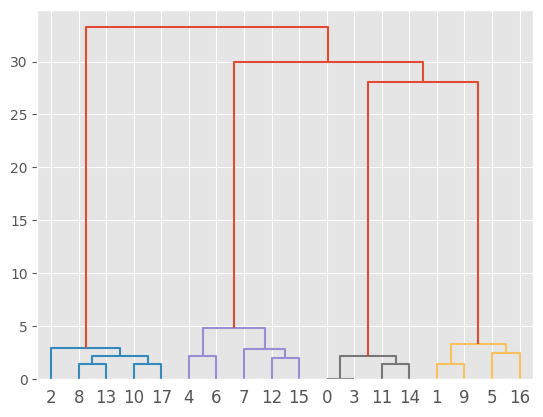

In [ ]:
link = linkage(df, 'ward', 'euclidean')
dn = dendrogram(link)

In [ ]:

df['dbscan_2'] = dbscan_2.labels_
df['cluster'] = fcluster(link, 4, criterion='maxclust')

In [ ]:
#  Таблица сопряженности для двух кластеризаций

tab1 = pd.crosstab(df['dbscan_2'], df['cluster'])

print(tab1)


cluster   1  2  3  4
dbscan_2            
0         0  0  4  0
1         0  0  0  4
2         5  0  0  0
3         0  5  0  0


In [ ]:
#  Таблица сопряженности для двух кластеризаций
#  Можно было и не создавать новые столбцы

tab2 = pd.crosstab(dbscan_2.labels_, fcluster(link, 4, criterion='maxclust'))

print(tab2)


col_0  1  2  3  4
row_0            
0      0  0  4  0
1      0  0  0  4
2      5  0  0  0
3      0  5  0  0


В этой задаче считать средние не нужно, <br>
так как решение совпало с предыдущим, <br>
для которого интерпретация есть. <br>

Заготовка для тех, кто захочет использовать код  <br>
для решения новых задач.

In [ ]:
df.groupby('cluster').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,dbscan_2
cluster,,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00,2.0
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00,3.0
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50,0.0
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25,1.0


In [ ]:
df.groupby(dbscan_2.labels_).mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,dbscan_2,cluster
0,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50,0.0,3.0
1,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25,1.0,4.0
2,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00,2.0,1.0
3,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00,3.0,2.0


Пример 3. Потребление протеинов в Европе.
------------------

In [ ]:
df = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


Стандартизация данных
--------------------
В этом примере данные измерены в одной шкале, в одних и тех же единицах, но значения в разных столбцах различаются почти на два порядка.

Вывод: данные надо стандартизировать.

В модуле preprocessing библиотеки sklearn реализованы несколько классов стандартизации данных:
* StandardScaler -- приведение к нулевому среднему и единичной дисперсии.
* MinMaxScaler -- приведение данных к отрезку [0, 1].
* MaxAbsScaler -- приведение к [-1, 1] (рекомендуется для разреженных данных).

Замечание. У этих методов есть методы-аналоги ```scale```, ```minmax_scale``` и ```maxabs_scale```, которые делают практически то же самое, но в задачах распознавания, которые встретяся позже, удобнее использовать именно рассматриваемый вариант.

Процесс стандартизации выглядит так:

In [ ]:
from sklearn import preprocessing

# Выбираем один из вариантов нормализации

norm = preprocessing.StandardScaler()
# norm = preprocessing.MaxAbsScaler()
# norm = preprocessing.MinMaxScaler()

# вычисляем параметры нормализации (они будут сохранены внутри объекта norm)
norm.fit(df)
# преобразовываем данные с параметрами
X = norm.transform(df)
# Полученный на предыдущем шаге объект X -- это матрица класса numpy.ndarray.
# Глазами на неё смотреть неудобно, лучше преобразовать её в объект класса pandas.DataFrame.
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [ ]:
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


In [ ]:
dbscan_2 = DBSCAN(eps=2.1, metric='euclidean', min_samples=2)

dbscan_2.fit(X)

unique, counts = np.unique(dbscan_2.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 10]
 [ 0  9]
 [ 1  3]
 [ 2  3]]


До сих пор мы подгоняли решение под кластеризацию, <br>
полученную ранее другой процедурой. <br>
Это нелогично, мы же надеемся получить новый взгляд на данные. <br>
Попробуем оценивать кластеры, основываясь на составе полученных кластеров.

In [ ]:
df['dbscan'] = dbscan_2.labels_


df['dbscan'].sort_values()

Country
Albania          -1
USSR             -1
Spain            -1
Portugal         -1
Poland           -1
Hungary          -1
Greece           -1
France           -1
Italy            -1
Finland          -1
E_Germany         0
Ireland           0
W_Germany         0
Netherlands       0
Czechoslovakia    0
Belgium           0
Switzerland       0
UK                0
Austria           0
Bulgaria          1
Romania           1
Yugoslavia        1
Denmark           2
Norway            2
Sweden            2
Name: dbscan, dtype: int64

In [ ]:
dbscan_2 = DBSCAN(eps=2.6, metric='euclidean', min_samples=2)

dbscan_2.fit(X)

unique, counts = np.unique(dbscan_2.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  4]
 [ 0 15]
 [ 1  4]
 [ 2  2]]


In [ ]:
df['dbscan'] = dbscan_2.labels_

df['dbscan'].sort_values()

Country
Albania          -1
Portugal         -1
USSR             -1
Spain            -1
Czechoslovakia    0
Denmark           0
E_Germany         0
Finland           0
France            0
Sweden            0
Switzerland       0
Ireland           0
W_Germany         0
Netherlands       0
Norway            0
Poland            0
Austria           0
Belgium           0
UK                0
Yugoslavia        1
Hungary           1
Bulgaria          1
Romania           1
Greece            2
Italy             2
Name: dbscan, dtype: int64

In [ ]:
dbscan_2 = DBSCAN(eps=2.6, metric='euclidean', min_samples=3)

dbscan_2.fit(X)

unique, counts = np.unique(dbscan_2.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  6]
 [ 0 15]
 [ 1  4]]


###  Silhouette для автоматического определения значений параметров

In [ ]:
#  Активирую процедуры измерения качества кластеризации
#  Будет нужна процедура силуэт

from sklearn import metrics


In [ ]:
#  Создаю списки тех значений параметров, которые собираюся перебирать.
#  Терминология: решетка (grid)
#  Терминология: поиск на решетке (grid search)

eps_1 = [0.95, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4]
min_samples_1 = [2, 3, 4, 5, 6, 7, 8, 9, 10]



In [ ]:
sil_avg = []

#  Для сохранения наилучшено набора параметров
max_value = [0, 0, 0, -1]



In [ ]:
#  Перебираю все пары значений параметров
#  Сохраняю лучшее решение

for i in range(len(eps_1)):
    for j in range(len(min_samples_1)):

        db = DBSCAN(min_samples = min_samples_1[j], eps =eps_1[i]).fit(X)

        labels = db.labels_

        # Число кластеров, после отбрасывания выбросов.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        # Число выбросов.
        # n_noise_ = list(labels).count(-1)

        if n_clusters_ > 1:
            silhouette_avg = metrics.silhouette_score(df, labels)
            if silhouette_avg > max_value[3]:
                max_value=(eps_1[i], min_samples_1[j], n_clusters_, silhouette_avg)
            sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.3452


In [ ]:
dbscan_4 = DBSCAN(eps=max_value[0], metric='euclidean', min_samples=max_value[1], algorithm= 'brute')

dbscan_4.fit(X)

unique, counts = np.unique(dbscan_4.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  7]
 [ 0 15]
 [ 1  3]]


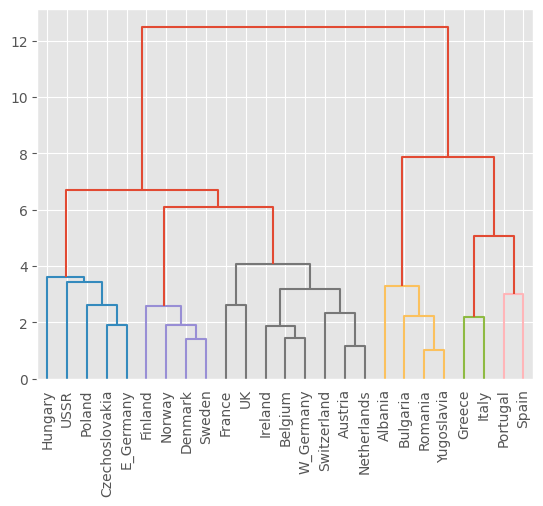

In [ ]:
link = linkage(X, 'ward', 'euclidean')
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # опция для более красивого отображения слишком ветввистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5,
                leaf_rotation=90.)

In [ ]:
df['cluster'] = fcluster(link, 5, criterion='distance')

In [ ]:
df.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,dbscan
cluster,,,,,,,,,,
1,7.9200,10.0400,2.8400,13.8400,2.740,35.740,5.56,2.5400,4.260,0.0
2,9.8500,7.0500,3.1500,26.6750,8.225,22.675,4.55,1.1750,2.125,0.0
3,13.2125,10.6375,3.9875,21.1625,3.375,24.700,4.65,2.0625,4.175,0.0
4,7.1250,4.6750,1.2000,9.4500,0.750,51.125,1.95,5.0500,2.975,0.5
5,9.6000,4.0500,2.8500,15.6500,4.650,39.250,2.15,6.0500,6.600,2.0
6,6.6500,3.5500,2.1000,6.7500,10.600,28.100,5.80,5.3000,7.550,-1.0


###   Вспомогательные ячейки.
###   Для обучения не нужны

In [ ]:
#  Вопрос Почему не работает подход как в R?
#  Какие-то капризы Pandas

# Создаю таблицу res_  с результатами разных кластеризаций

res_ = pd.DataFrame()

res_['dbscan_2'] = dbscan_2.labels_
res_['dbscan_3'] = dbscan_4.labels_
res_['cluster']  = fcluster(link, 3, criterion='maxclust')



In [ ]:
df.groupby(res_['dbscan_2']).mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,dbscan,cluster
dbscan_2,,,,,,,,,,,


In [ ]:
df.groupby(res_['cluster']).mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,dbscan,cluster
cluster,,,,,,,,,,,


In [ ]:
#  Таблица сопряженности для двух кластеризаций
tab = pd.crosstab(res_['dbscan_2'], res_['cluster'])

print(tab)


cluster    1  2  3
dbscan_2          
-1         1  1  4
 0        15  0  0
 1         1  3  0


In [ ]:
#  Таблица сопряженности для двух других кластеризаций

tab2 = pd.crosstab(res_['dbscan_3'], res_['cluster'])

print(tab2)


cluster    1  2  3
dbscan_3          
-1         2  1  4
 0        15  0  0
 1         0  3  0
